In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats   
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv(r'C:\Users\15512\Desktop\Projects\Financial Analytics in Python\Apple Stock Dashboard\AAPL.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/21/2022,168.910004,171.529999,165.910004,166.419998,165.417953,87227800
1,4/22/2022,166.460007,167.869995,161.500000,161.789993,160.815796,84882400
2,4/25/2022,161.119995,163.169998,158.460007,162.880005,161.899261,96046400
3,4/26/2022,162.250000,162.339996,156.720001,156.800003,155.855881,95623200
4,4/27/2022,155.910004,159.789993,155.380005,156.570007,155.627274,88063200
...,...,...,...,...,...,...,...
247,4/17/2023,165.089996,165.389999,164.029999,165.229996,165.229996,41516200
248,4/18/2023,166.100006,167.410004,165.649994,166.470001,166.470001,49923000
249,4/19/2023,165.800003,168.160004,165.539993,167.630005,167.630005,47720200
250,4/20/2023,166.089996,167.869995,165.559998,166.649994,166.649994,52456400


In [4]:
df.head().round(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/21/2022,168.9,171.5,165.9,166.4,165.4,87227800
1,4/22/2022,166.5,167.9,161.5,161.8,160.8,84882400
2,4/25/2022,161.1,163.2,158.5,162.9,161.9,96046400
3,4/26/2022,162.2,162.3,156.7,156.8,155.9,95623200
4,4/27/2022,155.9,159.8,155.4,156.6,155.6,88063200


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

C:\Users\15512\AppData\Local\Temp\ipykernel_17056\179903728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,cmap='viridis')


<Axes: >

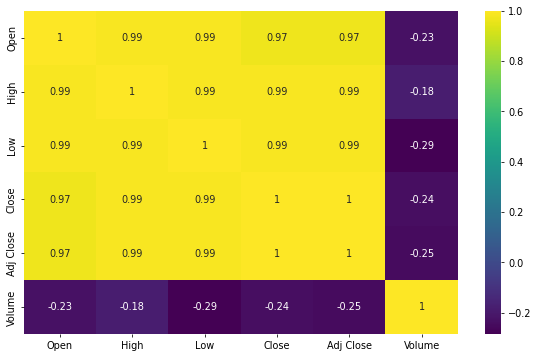

In [6]:
plt.figure(figsize=(10,6),dpi=70)
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.corr()['Adj Close']

C:\Users\15512\AppData\Local\Temp\ipykernel_17056\2934966909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Adj Close']


Open         0.968364
High         0.985623
Low          0.988849
Close        0.999677
Adj Close    1.000000
Volume      -0.247969
Name: Adj Close, dtype: float64

In [11]:
X=df.drop(['Adj Close','Date'],axis=1)
y=df['Adj Close']

In [12]:
df.shape,X.shape,y.shape

((252, 7), (252, 5), (252,))

<Figure size 320x160 with 0 Axes>

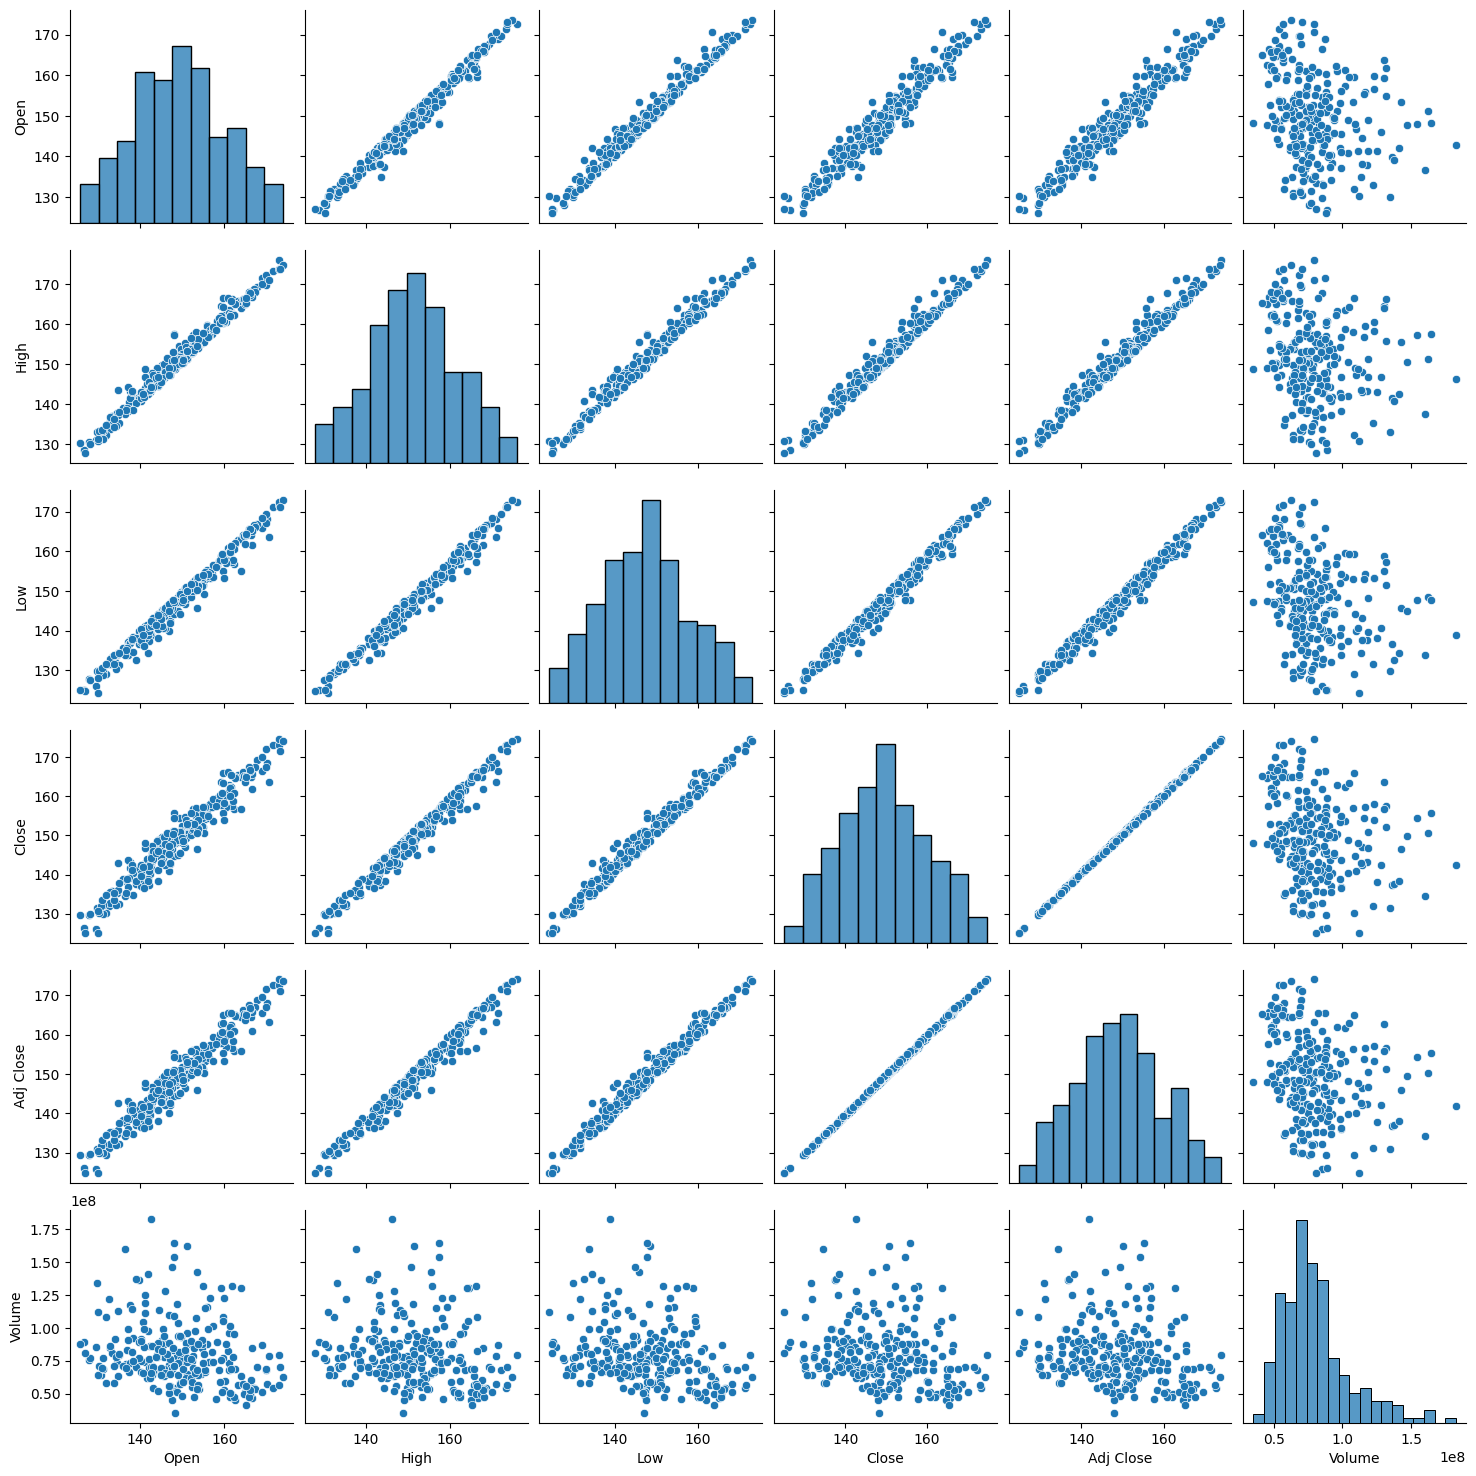

In [13]:
plt.figure(figsize=(4,2),dpi=80)
sns.pairplot(data=df)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
scaler=StandardScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(Scaled_X_train,y_train)
lr_preds=lr_model.predict(Scaled_X_test)
lr_preds

array([136.0560274 , 142.57997582, 161.11262995, 133.25284327,
       133.17366788, 138.67093727, 145.1426952 , 155.41188403,
       144.51190107, 166.87352611, 130.53207728, 152.88840476,
       147.70823738, 150.28581112, 152.2174789 , 158.52290995,
       151.31121397, 136.31316801, 145.04118619, 129.27564217,
       156.07655354, 165.1074619 , 148.34521501, 162.82738015,
       153.51257629, 137.54752617, 135.54817491, 160.96044455,
       149.15826179, 154.19339245, 172.63818491, 140.64521882,
       149.2123618 , 154.02072313, 140.71146206, 160.47480984,
       142.28450422, 154.98917145, 137.65198615, 151.31039697,
       132.47846992, 149.90767753, 141.71155996, 151.42914808,
       163.057168  , 164.67352755, 154.52972735, 145.80047812,
       164.466729  , 136.76085435, 155.35388504, 145.49761346,
       150.29433167, 156.32158562, 141.79455999, 129.67858688,
       147.95353821, 141.57864072, 142.25087027, 150.00339709,
       125.7208317 , 129.37070842, 148.16875272, 150.73

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\15512\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\__init__.py)

In [21]:
mean_absolute_error(y_test,lr_preds)

0.21306833775772205

In [22]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.25322559045692905

In [23]:
X.iloc[1,:]

Open      1.664600e+02
High      1.678700e+02
Low       1.615000e+02
Close     1.617900e+02
Volume    8.488240e+07
Name: 1, dtype: float64

In [24]:
y.iloc[1]

160.815796

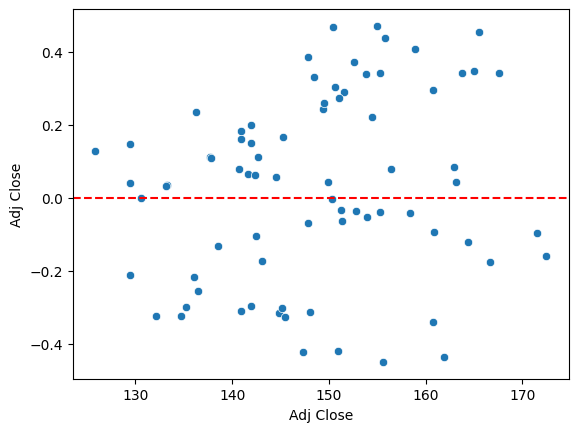

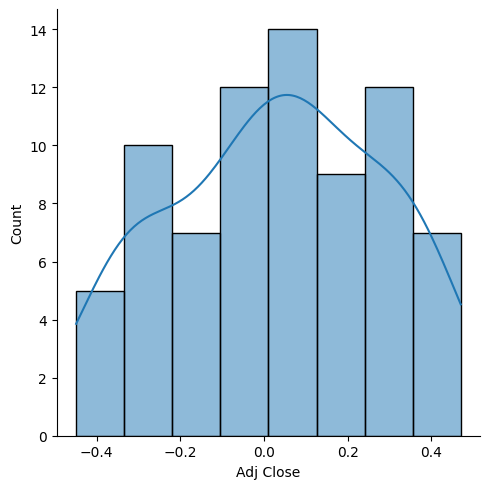

In [25]:
residuals=y_test-lr_preds
residuals
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='r',ls='--')
sns.displot(residuals,kde=True)

LinearRegression()

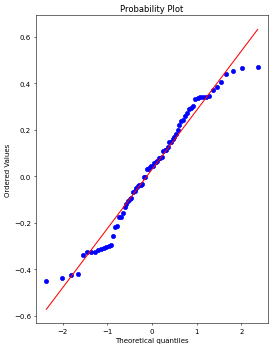

In [26]:
import scipy as sp
g,ax=plt.subplots(figsize=(6,8),dpi=50)
_=sp.stats.probplot(residuals,plot=ax)
final_model=LinearRegression()
final_model.fit(X_train,y_train)

In [27]:
final_model.coef_

array([ 4.16618712e-03, -2.80946142e-02,  1.89544412e-02,  9.99199896e-01,
       -4.00884472e-09])

In [28]:
final_model.intercept_

0.8793973285120273

In [29]:
y_new=final_model.predict(Scaled_X_test)

C:\Users\15512\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
#ALL_Types_of_Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [32]:
def run_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

In [33]:
#Polynomial_Regression?
pipe=make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

MAE: 6.376367561950533
RMSE: 13.684710009548533


In [34]:
#Decision_Tree_Regression
tree=DecisionTreeRegressor()
run_model(tree,X_train,X_test,y_train,y_test)

MAE: 0.5037135394736821
RMSE: 0.6914919150626313


In [35]:
#Support_Vector_Machine...how bais or how noise we want that depends on gamma
svr=SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
grid=GridSearchCV(svr,param_grid)
run_model(grid,X_train,X_test,y_train,y_test)

MAE: 8.940792469104526
RMSE: 10.386568383527486


In [36]:
#Random_Forest_Regression
rfr=RandomForestRegressor(n_estimators=10)
run_model(rfr,X_train,X_test,y_train,y_test)

MAE: 0.4552231421052624
RMSE: 0.6143446543906577


In [37]:
#Graident_Boosting_Regression
boost=GradientBoostingRegressor()
run_model(boost,X_train,X_test,y_train,y_test)

MAE: 0.37475132481747037
RMSE: 0.4996041004623701


In [40]:
adaboost=AdaBoostRegressor()
run_model(adaboost,X_train,X_test,y_train,y_test)

MAE: 0.45053308877310405
RMSE: 0.5564480187174214


#We can see that to predict Adj Close Decision Tree Regressor has the minimum error rate.So we will deploy it as our final model.

In [39]:
X_test.iloc[1,:].to_numpy()

array([1.47070007e+02, 1.47300003e+02, 1.41919998e+02, 1.42910004e+02,
       6.47272000e+07])

In [41]:
#Decision_Tree_Regression
tree=DecisionTreeRegressor()
run_model(tree,X_train,X_test,y_train,y_test)
tree.predict([[3.53620003e+02, 3.54989994e+02, 3.49349998e+02, 3.50420010e+02,8.47000000e+07]])

MAE: 0.4624743552631567
RMSE: 0.6248207559241017


C:\Users\15512\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([173.596527])

In [42]:
y_test.iloc[1]

142.692139

Very Close, almost zero error.
This was just to predict Adj Close of Apple stock. In real life it is impossible to predict the stock price. 